In [90]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import scipy.stats as stats

### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [91]:
# Importing the data
claims_df = pd.read_csv("C:\\Users\\ayirp\\Desktop\\DataAnalysis\\Python\\AnalytixLabs\\PythonCaseStudy\\Python Foundation Case Study 3 - Insurance Claims Case Study\\Claims.csv")
cust_demographics_df = pd.read_csv("C:\\Users\\ayirp\\Desktop\\DataAnalysis\\Python\\AnalytixLabs\\PythonCaseStudy\\Python Foundation Case Study 3 - Insurance Claims Case Study\\cust_demographics.csv")

# Merging the data
Customer_Claims_Data = cust_demographics_df.merge(claims_df, left_on = 'CUST_ID', right_on = 'customer_id')

# Removing the redundant customer id column
Customer_Claims_Data.pop('customer_id')

display(Customer_Claims_Data)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


### Q2. Perform a data audit for the datatypes and find out if there are any  within the current datatypes of the columns and their business significance.


In [92]:
# Change DateOfBirth from object to datetime
Customer_Claims_Data['DateOfBirth'] = pd.to_datetime(Customer_Claims_Data['DateOfBirth'])

# Change claim_date from object to datetime
Customer_Claims_Data['claim_date'] = pd.to_datetime(Customer_Claims_Data['claim_date'])

# Change total_policy_claims from float64 to int64
Customer_Claims_Data['total_policy_claims'] = Customer_Claims_Data['total_policy_claims'].fillna(0)
Customer_Claims_Data['total_policy_claims'] = Customer_Claims_Data['total_policy_claims'].astype(np.int64)

display(Customer_Claims_Data.dtypes)

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims             int64
fraudulent                     object
dtype: object

### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [93]:
# Remove the $ sign and Change claim_amount from object to float64

# Changing it to a str and then removing the $ and converting to float
Customer_Claims_Data['claim_amount'] = Customer_Claims_Data['claim_amount'].astype(str)
Customer_Claims_Data['claim_amount'] = pd.to_numeric(Customer_Claims_Data.claim_amount.str.replace("$",""),downcast='float',errors ='coerce')

display(Customer_Claims_Data.dtypes)

C:\Users\ayirp\AppData\Local\Temp/ipykernel_12424/3257939015.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Customer_Claims_Data['claim_amount'] = pd.to_numeric(Customer_Claims_Data.claim_amount.str.replace("$",""),downcast='float',errors ='coerce')


CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims             int64
fraudulent                     object
dtype: object

### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [94]:
# Fetching all the injury claims by checking the claim_type column to create an alert flag for them
injury_claims = Customer_Claims_Data[Customer_Claims_Data.claim_type == 'Injury only']

# Creating an alert flag for the injury claims by checking the police report column
injury_claims['Alert_Flag'] = np.where(injury_claims.police_report == 'No',0,
                                     np.where(injury_claims.police_report == "Yes",1,
                                     np.nan))


display(injury_claims)

C:\Users\ayirp\AppData\Local\Temp/ipykernel_12424/666270716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_claims['Alert_Flag'] = np.where(injury_claims.police_report == 'No',0,


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,0.0
18,18288638,Female,2069-01-14,MI,314-135-1359,Platinum,67257404,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.0,1,No,1.0
21,63916778,Male,2066-09-07,IL,146-157-4572,Platinum,7809917,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1,No,0.0
22,17004138,Female,2065-08-13,WA,436-354-4682,Silver,29205389,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1,No,0.0
23,9667764,Female,1979-10-10,SC,643-978-8251,Platinum,19051665,Other causes,2017-12-17,Auto,Yes,Injury only,36190.0,1,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,90217818,Female,1980-05-18,TN,891-651-8671,Gold,85546357,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1,Yes,0.0
1064,75934330,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1,No,1.0
1072,51669975,Female,1988-02-05,ND,975-463-9541,Silver,50800999,Other causes,2018-09-19,Home,Yes,Injury only,38950.0,1,No,1.0
1074,87596868,Male,2061-11-18,AZ,573-396-3182,Silver,36599575,Driver error,2018-10-09,Auto,Unknown,Injury only,33330.0,2,No,NaN


### Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [95]:
# Sorting the data by claim date for the cust ids
Customer_Claims_Data.sort_values(by=['CUST_ID','claim_date'], inplace=True)

# Dropping the duplicates but keeping the last one's
Customer_Claims_Data.drop_duplicates(['CUST_ID'], keep='last',inplace=True, ignore_index=True)

display(Customer_Claims_Data)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1,Yes
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1,Yes
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2,Yes
3,441097,Male,2071-08-19,CA,187-348-8375,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1,No
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,517-562-4916,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1,No
1074,99723844,Female,2066-06-19,HI,457-752-1374,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1,No
1075,99761663,Female,2063-11-18,NC,643-246-4718,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1,Yes
1076,99892000,Male,1995-06-08,OR,395-246-6172,Gold,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2,Yes


### Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [96]:
Customer_Claims_Data.dtypes
# Getting the continuous data
conti_cols= Customer_Claims_Data.select_dtypes(include='number')

# Getting the categorical data
cate_cols= Customer_Claims_Data.select_dtypes(exclude='number')

print('The number of missing values in continuous :\n',conti_cols.isnull().sum())
print('\n\nThe number of missing values in categorical :\n',cate_cols.isnull().sum())

#Since only claim_amount has missing values we will fill it
Customer_Claims_Data['claim_amount'] = Customer_Claims_Data['claim_amount'].fillna(Customer_Claims_Data['claim_amount'].mean())

conti_cols1= Customer_Claims_Data.select_dtypes(include='number')

print('\n\n After filling the missing values : \n',conti_cols1.isnull().sum())

The number of missing values in continuous :
 CUST_ID                 0
claim_id                0
claim_amount           65
total_policy_claims     0
dtype: int64


The number of missing values in categorical :
 gender            0
DateOfBirth       0
State             0
Contact           0
Segment           0
incident_cause    0
claim_date        0
claim_area        0
police_report     0
claim_type        0
fraudulent        0
dtype: int64


 After filling the missing values : 
 CUST_ID                0
claim_id               0
claim_amount           0
total_policy_claims    0
dtype: int64


### Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria 
### Children < 18 
### Youth 18-30 
### Adult 30-60 
### Senior > 60

In [97]:
# Finding the age for the customers by adding a column to the dataset
def getAgeFromDOB(dob):
    dob = dob.date()
    today = datetime.date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

Customer_Claims_Data['Age'] = ( Customer_Claims_Data.DateOfBirth).apply(lambda x : getAgeFromDOB(x))

# defining the bins and labels to use the pd.cut() function create the age ranges
Customer_Claims_Data['Age_Range'] = pd.cut(Customer_Claims_Data.Age, bins=[0, 17, 30, 60, 150], right=True, labels=['Children', 'Youth', 'Adult', 'Senior'])

display('The age ranges for the customers is :',Customer_Claims_Data)

'The age ranges for the customers is :'

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age,Age_Range
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12501.729492,1,Yes,44,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1,Yes,49,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2,Yes,34,Adult
3,441097,Male,2071-08-19,CA,187-348-8375,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1,No,-49,NaN
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3,No,42,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,517-562-4916,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1,No,-43,NaN
1074,99723844,Female,2066-06-19,HI,457-752-1374,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1,No,-44,NaN
1075,99761663,Female,2063-11-18,NC,643-246-4718,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1,Yes,-42,NaN
1076,99892000,Male,1995-06-08,OR,395-246-6172,Gold,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2,Yes,27,Youth


### Q8. What is the average amount claimed by the customers from various segments?

In [98]:
segment_avg_amt = Customer_Claims_Data.groupby(['Segment']).agg({'claim_amount' : 'mean'})

display('The average amount claimed by the customers from various segments :', segment_avg_amt)

'The average amount claimed by the customers from various segments :'

,claim_amount
Segment,
Gold,12846.400391
Platinum,12371.655273
Silver,12267.859375


### Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [99]:
# The specified date and calculating the 20 days prior to the date
specified_date = pd.to_datetime('2018-10-01')   
days_before_specified_date = (specified_date - datetime.timedelta(days=20)).isoformat()

# Calculating the total claim amount
Customer_Claims_Data.loc[Customer_Claims_Data.claim_date > days_before_specified_date , :].groupby(['incident_cause']).agg({'claim_amount' : 'sum'})

,claim_amount
incident_cause,
Crime,34790.000000
Driver error,278086.906250
Natural causes,72086.226562
Other causes,499777.718750
Other driver error,240655.734375


### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [100]:
# Fetching the required records
req_driver_records = Customer_Claims_Data[ (Customer_Claims_Data.Age_Range == 'Adult') & (Customer_Claims_Data.State.isin(['TX','DE','AK'])) & (Customer_Claims_Data.incident_cause.str.lower().str.contains("driver"))]

# Grouping the records and finding the total policy claim count
print('The no. of adults from TX, DE and AK claimed insurance for driver related issues and causes\n',req_driver_records.groupby(by = "State")['total_policy_claims'].count())

The no. of adults from TX, DE and AK claimed insurance for driver related issues and causes
 State
AK    7
DE    8
TX    6
Name: total_policy_claims, dtype: int64


### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


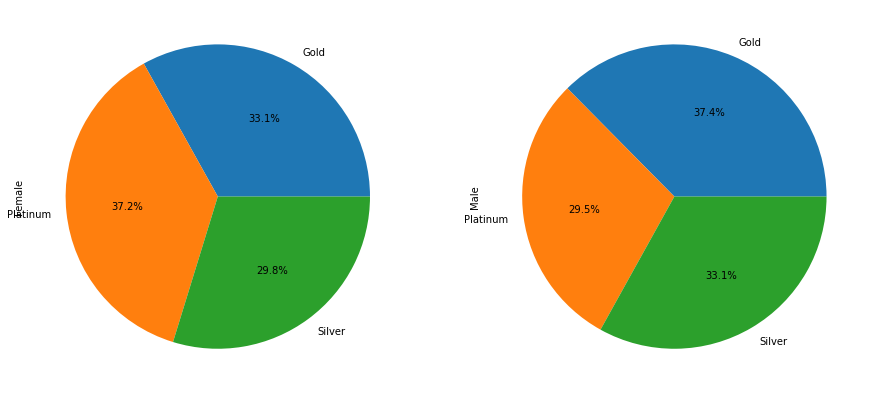

In [101]:
# Creating a pivot table with the needed values
pie_chart_data = pd.pivot_table(data = Customer_Claims_Data, index= 'Segment', columns = 'gender', values='claim_amount', aggfunc='sum')

# Plotting the pie chart
pie_chart_data.plot(kind='pie', subplots = True, legend = False, autopct='%1.1f%%', figsize=(15,15))
plt.show()

### Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


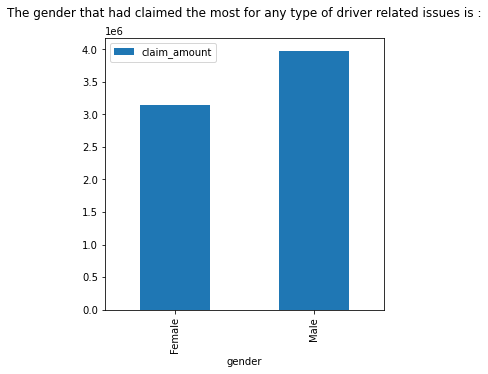

In [102]:
# Getting the genderwise claim amount for the driver related issues
gender_driver_claim = Customer_Claims_Data.loc[Customer_Claims_Data.incident_cause.str.lower().str.contains('driver')].groupby(['gender']).agg({'claim_amount' : sum})

# Plotting the bar chart to visualise the difference in the claim amounts
gender_driver_claim.plot(kind='bar', figsize=(5,5))
plt.title('The gender that had claimed the most for any type of driver related issues is :\n')
plt.show()

### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


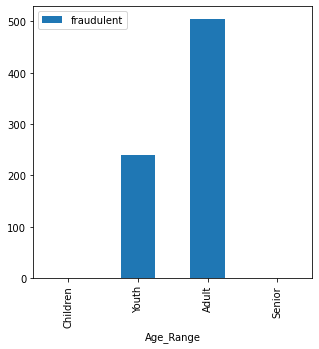

In [103]:
# Getting the Age rangewise fraudulent counts
Age_fraudulent = Customer_Claims_Data.groupby(['Age_Range']).agg({'fraudulent' : 'count'})

# Plotting it for better visualisation
Age_fraudulent.plot(kind='bar', figsize=(5,5))
plt.show()

### Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 


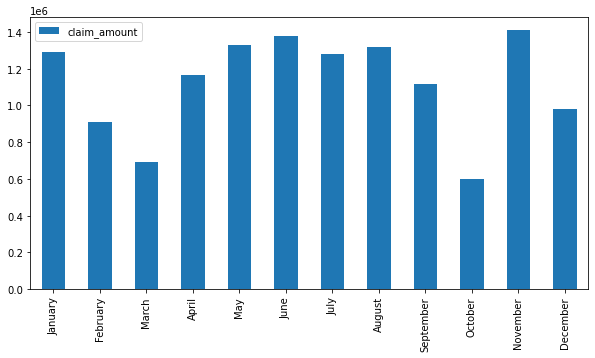

In [104]:
# Getting the months in a year and putting into a list
months = list(calendar.month_name)[1:]

# Finding the total claim amount based on months, Setting the months in the chronological order
monthly_claims = Customer_Claims_Data.groupby(Customer_Claims_Data['claim_date'].dt.month_name(locale="English")).agg({'claim_amount' : sum}).set_index([months])

# Plotting the bar graph
monthly_claims.plot(kind='bar', figsize=(10,5))
plt.show()

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


C:\Users\ayirp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


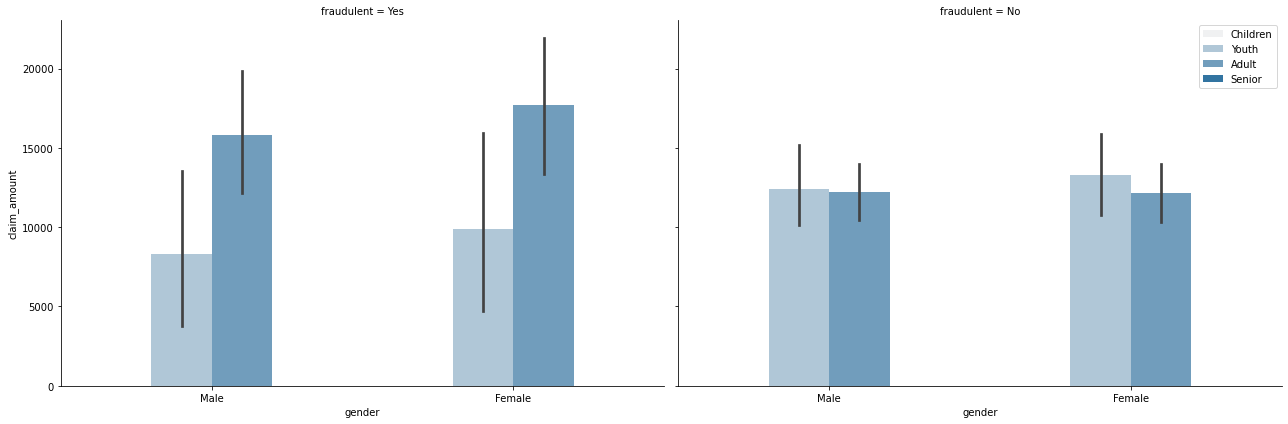

In [105]:
#Customer_Claims_Data.groupby(['gender', 'Age_Range', 'fraudulent']).agg({'claim_amount' : 'mean'})

# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(Customer_Claims_Data, col ="fraudulent", height=6, aspect=1.5)
hue = ['Children','Youth', 'Adult', 'Senior']

# map the above form facetgrid with some attributes
graph.map(sns.barplot,'gender', 'claim_amount','Age_Range',hue_order = hue)

# show the object
plt.legend()
plt.show()

### Q16. Is there any similarity in the amount claimed by males and females?


In [106]:
# Finding the mean for the claim amount claimed male and female
male_claim = Customer_Claims_Data[Customer_Claims_Data.gender == 'Male'].claim_amount
female_claim = Customer_Claims_Data[Customer_Claims_Data.gender == 'Female'].claim_amount

display('The claim amount mean for male :',male_claim.mean())
display('The claim amount mean for female :',female_claim.mean())

# We have 2 variables: 
# Gender        1 categorical
# Claim_amount  1 continuous

# So we can use the F -Test

# HYPOTHESIS

# 1) H0 = The amount claimed by males and females are different
# 2) Ha = The amount claimed by males and females are similar
# 3) CI = 95% ; pvalue = 0.05
# 4) Perform F-Test

print("Performing the ANOVA F -Test :")
display(stats.f_oneway(male_claim, female_claim))

print('Since the pvalue is more that 0.05 , i.e 0.33 , so we ACCEPT the Null Hypothesis.\n So we conclude that there is no similarity in the amount claimed by males and females')



'The claim amount mean for male :'

12884.8388671875

'The claim amount mean for female :'

12101.1552734375

Performing the ANOVA F -Test :


F_onewayResult(statistic=0.9264243102080167, pvalue=0.3360100426765805)

Since the pvalue is more that 0.05 , i.e 0.33 , so we ACCEPT the Null Hypothesis.
 So we conclude that there is no similarity in the amount claimed by males and females


### Q17. Is there any relationship between age category and segment?


In [107]:
### Age Category  : 1 Categorical
### Segment       : 1 Categorical

# To determine the relationship between 2 categorical variables ,we can use the Chi Square test

# HYPOTHESIS


# 1) H0 = age category and segment are independent
# 2) Ha = age category and segment are dependent
# 3) CI = 95% ; pvalue = 0.05
# 4) Perform Chi Square Test

segment_age_range = pd.crosstab(Customer_Claims_Data['Age_Range'], Customer_Claims_Data['Segment'])

display(stats.chi2_contingency(segment_age_range))
print('The pvalue is 0.413 , which is greater than 0.05. So,we ACCEPT the H0.The age category and segment are independent')

(1.7664562880908818,
 0.41344609157991863,
 2,
 array([[ 82.99057873,  80.73889637,  75.2705249 ],
        [175.00942127, 170.26110363, 158.7294751 ]]))

The pvalue is 0.413 , which is greater than 0.05. So,we ACCEPT the H0.The age category and segment are independent


### Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [108]:
# Given avg for 2016-2017 claim amount
given_avg_2016 = 10000

# Check the date range of the given dataset
print("The from date in range:",Customer_Claims_Data.claim_date.min())
print("The to date in range:",Customer_Claims_Data.claim_date.max())

# So let us consider one year only,i.e from 01-01-2017 to 01-01-2018 for the calculations
req_2017_2018 = Customer_Claims_Data[Customer_Claims_Data.claim_date<'2018-01-01']

# HYPOTHESIS

# 1) H0 = The current year has NOT shown the significant rise as compared to 2016-17
# 2) Ha = The current year has shown the significant rise as compared to 2016-17
# 3) CI = 95% ; pvalue = 0.05
# 4) Perform T Test


display(stats.ttest_1samp(req_2017_2018.claim_amount , given_avg_2016))
print('Since the pvalue generated is 2.700781398837267e-05 , which is less than 0.05 we have to REJECT the H0.\n')

The from date in range: 2017-01-01 00:00:00
The to date in range: 2018-10-30 00:00:00


Ttest_1sampResult(statistic=4.230562205435042, pvalue=2.700781398837267e-05)

Since the pvalue generated is 2.700781398837267e-05 , which is less than 0.05 we have to REJECT the H0.



### Q19. Is there any difference between age groups and insurance claims?

In [109]:

# Age groups  : 1 Categorical
# Claim Amount : 1 Continuous
# 2 variables ,i.e 1 categorical and 1 continuous So we can use the F -Test

# HYPOTHESIS

# 1) H0 = There is no difference between age groups and insurance claims
# 2) Ha = There is difference between age groups and insurance claims
# 3) CI = 95% ; pvalue = 0.05
# 4) Perform F-Test

a1 = Customer_Claims_Data.loc[Customer_Claims_Data.Age_Range == 'Adult', 'claim_amount']
a2 = Customer_Claims_Data.loc[Customer_Claims_Data.Age_Range == 'Youth', 'claim_amount']
a3 = Customer_Claims_Data.loc[Customer_Claims_Data.Age_Range == 'Children', 'claim_amount']
a4 = Customer_Claims_Data.loc[Customer_Claims_Data.Age_Range == 'Senior', 'claim_amount']

print("Age Rangewise claims:\n",'Adult:',a1.mean(),"\n",'Youth:',a2.mean(),"\n",'Children:',a3.mean(),"\n",'Senior:',a4.mean(),"\n")
print("Since there are no claims by senior and children , lets not consider them in the F test and consider only the adult and youth\n")

print("Performing the ANOVA F -Test :")
display(stats.f_oneway(a1, a2))
print("The pvalue is pvalue=0.298 , which is more than the assumed pvalue =0.05. Hence , we ACCEPT the Null Hypothesis")

Age Rangewise claims:
 Adult: 13199.373046875 
 Youth: 12100.7001953125 
 Children: nan 
 Senior: nan 

Since there are no claims by senior and children , lets not consider them in the F test and consider only the adult and youth

Performing the ANOVA F -Test :


F_onewayResult(statistic=1.081170744680794, pvalue=0.2987749511345121)

The pvalue is pvalue=0.298 , which is more than the assumed pvalue =0.05. Hence , we ACCEPT the Null Hypothesis


### Q20. Is there any relationship between total number of policy claims and the claimed amount?


In [110]:
### Total no. of policy claims  : 1 Continuous
### Claim Amount       : 1 Continuous

# To determine the relationship between 2 Continuous variables ,we can use the Pearson's Co-efficient Correlation

# HYPOTHESIS


# 1) H0 = Total no. of policy claims and Claim Amount are independent
# 2) Ha = Total no. of policy claims and Claim Amount are dependent
# 3) CI = 95% ; pvalue = 0.05
# 4) Perform Pearson's Co-efficient Correlation Test

print("Performing the Pearson's Co-efficient Correlation Test")
display(stats.pearsonr(Customer_Claims_Data.total_policy_claims, Customer_Claims_Data.claim_amount))

print('The pvalue generated is 0.448 , which is greater than the assumed pvalue = 0.05. Hence, we ACCEPT the Null Hypothesis')


Performing the Pearson's Co-efficient Correlation Test


(-0.02310650270513016, 0.44852597127216365)

The pvalue generated is 0.448 , which is greater than the assumed pvalue = 0.05. Hence, we ACCEPT the Null Hypothesis
